In [1]:
from os.path import dirname, join as pjoin
import scipy.io as sio



In [2]:
mat_fname = 'AllSamples.mat'
mat_contents = sio.loadmat(mat_fname)

In [3]:
sorted(mat_contents.keys())

['AllSamples', '__globals__', '__header__', '__version__']

In [4]:
mat_contents['AllSamples']

array([[ 2.05924902,  7.20598798],
       [ 8.87578072,  8.96092361],
       [ 8.00706441,  2.77531997],
       [ 5.01728788,  3.76311975],
       [ 6.39056222,  5.17956451],
       [ 1.95480368,  7.78421782],
       [ 4.80754093,  3.03464954],
       [ 1.3483716 ,  3.96379638],
       [ 3.04101702, -0.36138487],
       [ 8.61947945,  2.98598319],
       [ 6.11106851,  6.23497555],
       [ 3.84278989,  5.53546695],
       [ 1.69565649,  7.68082458],
       [ 4.05095774,  4.05212767],
       [ 2.48989693,  8.40047863],
       [ 6.6384501 ,  8.33574252],
       [ 6.6781262 ,  1.1080157 ],
       [ 6.2396717 ,  6.55049457],
       [ 4.72935154,  3.80839045],
       [ 3.81135136,  5.98125361],
       [ 4.90270653,  3.48642863],
       [ 7.59763505,  7.93924   ],
       [ 7.59731342,  1.16504743],
       [ 2.07898569,  7.16739313],
       [ 7.30246332,  3.16580577],
       [ 6.63352332,  0.98020705],
       [ 3.06996954,  5.97020551],
       [ 4.34489155,  3.99726667],
       [ 3.02105687,

In [5]:
d_struct = mat_contents['AllSamples']
d_struct.dtype

dtype('<f8')

In [6]:
d_struct.size

600

In [7]:
d_struct.shape

(300, 2)

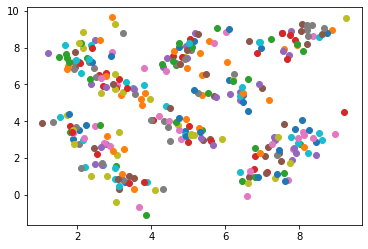

In [22]:
import numpy as np
data = np.array(d_struct)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(data)):
    plt.scatter(data[i][0],data[i][1],)
plt.show()

C:\Users\PATRIC~1\AppData\Local\Temp/ipykernel_6852/2816905226.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex], color = 'r')
C:\Users\PATRIC~1\AppData\Local\Temp/ipykernel_6852/2816905226.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex], color = 'r')
C:\Users\PATRIC~1\AppData\Local\Temp/ipykernel_6852/2816905226.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "Pr" (-> color='r'). The keyword argument will take precedence.
  plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12, color = 'g')
C:\Users\PATRIC~1\AppData\Local\Temp/ipykernel_6852/2816905226.py:60: UserWarning: color is r

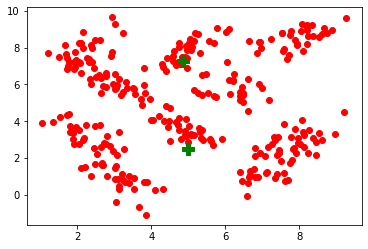

[[ 2.05924902  7.20598798]
 [ 8.87578072  8.96092361]
 [ 8.00706441  2.77531997]
 [ 5.01728788  3.76311975]
 [ 6.39056222  5.17956451]
 [ 1.95480368  7.78421782]
 [ 4.80754093  3.03464954]
 [ 1.3483716   3.96379638]
 [ 3.04101702 -0.36138487]
 [ 8.61947945  2.98598319]
 [ 6.11106851  6.23497555]
 [ 3.84278989  5.53546695]
 [ 1.69565649  7.68082458]
 [ 4.05095774  4.05212767]
 [ 2.48989693  8.40047863]
 [ 6.6384501   8.33574252]
 [ 6.6781262   1.1080157 ]
 [ 6.2396717   6.55049457]
 [ 4.72935154  3.80839045]
 [ 3.81135136  5.98125361]
 [ 4.90270653  3.48642863]
 [ 7.59763505  7.93924   ]
 [ 7.59731342  1.16504743]
 [ 2.07898569  7.16739313]
 [ 7.30246332  3.16580577]
 [ 6.63352332  0.98020705]
 [ 3.06996954  5.97020551]
 [ 4.34489155  3.99726667]
 [ 3.02105687  9.26213796]
 [ 2.20011496  1.53863221]
 [ 6.47098788  5.4510163 ]
 [ 5.37413088  5.44219234]
 [ 3.85212146 -1.08715226]
 [ 4.59083727  7.53490523]
 [ 4.9511002   8.08344216]
 [ 1.9311184   6.93692984]
 [ 8.21925014  9.11712554]
 

In [26]:
data_n= np.mat(data)
def center(data ,k):
    dim = np.shape(data)[1]
    cen_M = np.mat(np.zeros((k,dim)))
    for i in range(dim):
        minJ = min(data[:,i])
        rangeJ = float(max(data[:,i])-minJ)
        #print()
        #print('\n')
        #print(minJ)
        cen_M[:,i] = np.mat(minJ + rangeJ * np.random.rand(k,1))
    #print(data)   
    return cen_M
#center(data_n,k)
def kmeans(data,k):
    m = np.shape(data)[0]#列的大小
    classassment = np.mat(np.zeros((m,2)))
    centerpoint = center(data,k)
    Flag = True
    conut = 0
    while Flag:
        Flag = False
        for i in range(m):
            mindis=np.inf ; minindex=-1
            for j in range(k):
                disJ = np.linalg.norm(np.array(centerpoint[j,:])-np.array(data[i,:]))
                
                if disJ < mindis:
                    mindis = disJ; minindex = j
            if classassment[i,0] !=minindex:
                Flag = True
            classassment[i,:] = minindex,mindis**2
            #print(classassment)
            for cent in range(k):
                ptsInClust = data[np.nonzero(classassment[:,0].A==cent)[0]]#get all the point in this cluster
                centerpoint[cent,:] = np.mean(ptsInClust, axis=0)#get all the point in this cluster
                  
             
    return centerpoint,classassment

for k in range(2,11):          
    centerpoint,classassment=kmeans(data_n, k)          


def showCluster(dataSet, k, centroids, clusterAssment):
    '''
    数据可视化,只能画二维的图（若是三维的坐标图则直接返回1）
    '''
    numSamples, dim = dataSet.shape
    mark = ['or', 'ob', 'og', 'ok','oy','om','oc', '^r', '+r', 'sr', 'dr', '<r', 'pr']

    # draw all samples
    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex], color = 'r')

    mark = ['Pr', 'Pb', 'Pg', 'Pk','Py','Pm','Pc','^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12, color = 'g')
    plt.show()
showCluster(data_n,2,centerpoint,classassment)
print(data_n)

C:\Users\PATRIC~1\AppData\Local\Temp/ipykernel_6852/2816905226.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex], color = 'r')
C:\Users\PATRIC~1\AppData\Local\Temp/ipykernel_6852/2816905226.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex], color = 'r')
C:\Users\PATRIC~1\AppData\Local\Temp/ipykernel_6852/2816905226.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "Pr" (-> color='r'). The keyword argument will take precedence.
  plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12, color = 'g')
C:\Users\PATRIC~1\AppData\Local\Temp/ipykernel_6852/2816905226.py:60: UserWarning: color is r

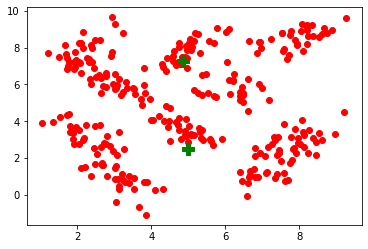

[[ 2.05924902  7.20598798]
 [ 8.87578072  8.96092361]
 [ 8.00706441  2.77531997]
 [ 5.01728788  3.76311975]
 [ 6.39056222  5.17956451]
 [ 1.95480368  7.78421782]
 [ 4.80754093  3.03464954]
 [ 1.3483716   3.96379638]
 [ 3.04101702 -0.36138487]
 [ 8.61947945  2.98598319]
 [ 6.11106851  6.23497555]
 [ 3.84278989  5.53546695]
 [ 1.69565649  7.68082458]
 [ 4.05095774  4.05212767]
 [ 2.48989693  8.40047863]
 [ 6.6384501   8.33574252]
 [ 6.6781262   1.1080157 ]
 [ 6.2396717   6.55049457]
 [ 4.72935154  3.80839045]
 [ 3.81135136  5.98125361]
 [ 4.90270653  3.48642863]
 [ 7.59763505  7.93924   ]
 [ 7.59731342  1.16504743]
 [ 2.07898569  7.16739313]
 [ 7.30246332  3.16580577]
 [ 6.63352332  0.98020705]
 [ 3.06996954  5.97020551]
 [ 4.34489155  3.99726667]
 [ 3.02105687  9.26213796]
 [ 2.20011496  1.53863221]
 [ 6.47098788  5.4510163 ]
 [ 5.37413088  5.44219234]
 [ 3.85212146 -1.08715226]
 [ 4.59083727  7.53490523]
 [ 4.9511002   8.08344216]
 [ 1.9311184   6.93692984]
 [ 8.21925014  9.11712554]
 

In [34]:
def initCentroids_2(dataSet, k):
    numSamples, dim = dataSet.shape
    centroids = zeros((k, dim))
    # pick the first center randomly
    index = int(random.uniform(0, numSamples))
    centroids[0, :] = dataSet[index, :]

    for j in range(1, k):  # 计算第 j 个中心 (i>1)
        maxDist, maxIndex = -1, -1
        distance = 0
        for i in range(numSamples):  # 把每一个数据点划分到离它最近的中心点
            ## Iterate for each centroid
            ## step 2: find the centroid who is closest
            if j == 1:
                distance = euclDistance(centroids[0, :],dataSet[i, :])  # （在所有可能的样本中）选择一个样本，使得所选样本到之前 (i-1) 所有中心的平均距离最大.第1个中心不做平均值，直接算欧氏距离。
            if j > 1:
                distance = euclDistance(mean(centroids[:j-1], axis=0), dataSet[i, :]) # （在所有可能的样本中）选择一个样本，使得所选样本到之前 (i-1) 所有中心的平均距离最大
            if distance > maxDist:  # 如果第i个数据点到第j个中心点更远，则将i归属为j
                maxDist = distance
                maxIndex = j
        # print(centroids)
        centroids[j, :] = dataSet[maxIndex, :]
    # print(centroids)
    return centroids

    def showCluster(dataSet, k, centroids, clusterAssment):
        numSamples, dim = dataSet.shape
    mark = ['or', 'ob', 'og', 'ok','oy','om','oc', '^r', '+r', 'sr', 'dr', '<r', 'pr']

    # draw all samples
    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex], color = 'r')

    mark = ['Pr', 'Pb', 'Pg', 'Pk','Py','Pm','Pc','^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12, )
    plt.show()
showCluster(data_n,2,centerpoint,classassment)
print(data_n)

In [12]:
def obj_fun_show(obj_fun_val, strategy, round):
    obj_fun_val[k-2] = k, sum(clusterAssment[:,1])  # 求目标函数值
    plt.subplots(figsize=(8, 5))
    plt.title("Plots of objective function values / Strategy = "+str(strategy)+" / round = "+str(round+1))
    plt.ylabel('Objective function Value')
    plt.xlabel('K Value')
    plt.subplots_adjust(bottom=0.155)
    # plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
    plt.plot(obj_fun_val[:,0], obj_fun_val[:,1], marker='o',label='lineplots', color='b', markersize=6)
    plt.grid(True, linestyle='-.')
    plt.show()


In [2]:
def initCentroids(dataSet, strategy=1):
    ## init centroids
    if strategy == 1:
        centroids = initCentroids_1(dataSet, 10)
    elif strategy == 2:
        centroids = initCentroids_2(dataSet, 10)
    else:
        print("-- Wrong parameter, use default strategy - randomly pick the initial centers ...")
        centroids = initCentroids_1(dataSet, 10)
    return centroids

In [13]:
from numpy import *
import time
import matplotlib.pyplot as plt
 
 
# calculate Euclidean distance
def euclDistance(vector1, vector2):
	return sqrt(sum(power(vector2 - vector1, 2)))
 
# init centroids with random samples
def initCentroids(dataSet, k):
	numSamples, dim = dataSet.shape
	centroids = zeros((k, dim))
	for i in range(k):
		index = int(random.uniform(0, numSamples))
		centroids[i, :] = dataSet[index, :]
	return centroids
 
# k-means cluster
def kmeans(dataSet, k):
	numSamples = dataSet.shape[0]
	# first column stores which cluster this sample belongs to,
	# second column stores the error between this sample and its centroid
	clusterAssment = mat(zeros((numSamples, 2)))
	clusterChanged = True
 
	## step 1: init centroids
	centroids = initCentroids(dataSet, k)
 
	while clusterChanged:
		clusterChanged = False
		## for each sample
		for i in xrange(numSamples):
			minDist  = 100000.0
			minIndex = 0
			## for each centroid
			## step 2: find the centroid who is closest
			for j in range(k):
				distance = euclDistance(centroids[j, :], dataSet[i, :])
				if distance < minDist:
					minDist  = distance
					minIndex = j
			
			## step 3: update its cluster
			if clusterAssment[i, 0] != minIndex:
				clusterChanged = True
				clusterAssment[i, :] = minIndex, minDist**2
 
		## step 4: update centroids
		for j in range(k):
			pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[0]]
			centroids[j, :] = mean(pointsInCluster, axis = 0)
 
	print 'Congratulations, cluster complete!'
	return centroids, clusterAssment
 
# show your cluster only available with 2-D data
def showCluster(dataSet, k, centroids, clusterAssment):
	numSamples, dim = dataSet.shape
	if dim != 2:
		print "Sorry! I can not draw because the dimension of your data is not 2!"
		return 1
 
	mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
	if k > len(mark):
		print "Sorry! Your k is too large! please contact Zouxy"
		return 1
 
	# draw all samples
	for i in xrange(numSamples):
		markIndex = int(clusterAssment[i, 0])
		plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])
 
	mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
	# draw the centroids
	for i in range(k):
		plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)
 
	plt.show()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (Temp/ipykernel_15024/4189817249.py, line 54)